# Mushroom 1.1

Davide Coppola, matricola 478277

Creazione di un modello per la classificazione di funghi

## 1) Estrazione dataset

In [1]:
# import delle librerie fondamentali 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
mush_data = pd.read_csv('mushroom_data_all.csv')

In [3]:
mush_data.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# rimpiazzo delle lettere con valori numerici per la variabile target
mush_data['class_edible'] = mush_data['class_edible'].replace('p', 0)
mush_data['class_edible'] = mush_data['class_edible'].replace('e', 1)

mush_data.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# ripartizione in variabili descrittive e variabile target
y = mush_data['class_edible']
mush_data = mush_data.drop(labels=['class_edible'], axis=1)

mush_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: class_edible, dtype: int64

## 2) Preprocessing dei dati e split train/test set

In [7]:
# Utilizzo codifica One-Hot encoding su tutte le varaibili categoriche
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
total_data = pd.DataFrame(oh_encoder.fit_transform(mush_data))

total_data.index = mush_data.index

total_data

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
# Splitting dei dati
train_data, test_data, y_train, y_test = train_test_split(total_data, y, train_size=0.8, test_size=0.2)

In [9]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
2398,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5960,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5473,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y_train.head()

2398    1
5960    0
5473    0
3008    1
2475    1
Name: class_edible, dtype: int64

In [11]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
6172,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8038,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
563,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7656,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_test.head()

6172    0
8038    1
563     1
6229    0
7656    0
Name: class_edible, dtype: int64

## 3) Addestramento modello

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(random_state=3)

In [15]:
model.fit(train_data, y_train)

DecisionTreeClassifier(random_state=3)

In [16]:
print('Training accuracy: ' + str(model.score(train_data, y_train) * 100) + '%')

Training accuracy: 100.0%


## 4) Valutazione modello sul test/validation set

In [17]:
pred_values = model.predict(test_data)

In [18]:
print('Test accuracy: ' +  str(model.score(test_data, y_test) * 100) + '%')

Test accuracy: 100.0%


In [19]:
pred = pd.Series(data = pred_values, name='predicted_values')
pred.index = y_test.index

final_data = pd.concat([pred, y_test], axis=1)
final_data

,predicted_values,class_edible
6172,0,0
8038,1,1
563,1,1
6229,0,0
7656,0,0
...,...,...
772,1,1
6589,0,0
7505,0,0
1269,1,1


## 5) Prova con molteplici modelli

In [20]:
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [21]:
classifiers = []
rs = 3

classifiers.append(SVC(random_state=rs))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = rs))
classifiers.append(ExtraTreesClassifier(random_state=rs))
classifiers.append(RandomForestClassifier(random_state=rs))

In [22]:
train_results = []
test_results =[]

for classifier in classifiers:
    classifier.fit(train_data, y_train)
    train_results.append(str(classifier.score(train_data, y_train)*100) + '%')
    
for classifier in classifiers:
    test_results.append(str(classifier.score(test_data, y_test)*100) + '%')

In [23]:
clas_names = ['SVC', 'Linear Discriminant', 'k-NN', 'Logistic Regressor','Extra Tree', 'Random Forest']
train = pd.Series(data = train_results, index = clas_names, name='train_accuracy')
train

SVC                                100.0%
Linear Discriminant    99.95383905216187%
k-NN                               100.0%
Logistic Regressor                 100.0%
Extra Tree                         100.0%
Random Forest                      100.0%
Name: train_accuracy, dtype: object

In [24]:
test = pd.Series(data = test_results, index = clas_names, name='test_accuracy')
test

SVC                    100.0%
Linear Discriminant    100.0%
k-NN                   100.0%
Logistic Regressor     100.0%
Extra Tree             100.0%
Random Forest          100.0%
Name: test_accuracy, dtype: object

## 6) Prova con diversa variazione dello split train/test

In [25]:
train_data_nd, test_data_nd, y_train_nd, y_test_nd = train_test_split(total_data, y, train_size=0.60, test_size=0.40)

In [26]:
rs = 3
classifiers_nd = []

classifiers_nd.append(SVC(random_state=rs))
classifiers_nd.append(LinearDiscriminantAnalysis())
classifiers_nd.append(KNeighborsClassifier())
classifiers_nd.append(LogisticRegression(random_state = rs))
classifiers_nd.append(ExtraTreesClassifier(random_state=rs))
classifiers_nd.append(RandomForestClassifier(random_state=rs))

In [27]:
train_results_nd = []
test_results_nd =[]

for classifier in classifiers_nd:
    classifier.fit(train_data_nd, y_train_nd)
    train_results_nd.append(str(classifier.score(train_data_nd, y_train_nd)*100) + '%')
    
for classifier in classifiers_nd:
    test_results_nd.append(str(classifier.score(test_data_nd, y_test_nd)*100) + '%')

In [28]:
train = pd.Series(data = train_results_nd, index = clas_names, name='train_accuracy')
train

SVC                                100.0%
Linear Discriminant    99.95896594173163%
k-NN                               100.0%
Logistic Regressor                 100.0%
Extra Tree                         100.0%
Random Forest                      100.0%
Name: train_accuracy, dtype: object

In [29]:
test = pd.Series(data = test_results_nd, index = clas_names, name='test_accuracy')
test

SVC                                100.0%
Linear Discriminant    99.96923076923076%
k-NN                               100.0%
Logistic Regressor                 100.0%
Extra Tree                         100.0%
Random Forest                      100.0%
Name: test_accuracy, dtype: object

## 7) Creazione Matrice di Confusione

La facciamo sia per il train set che per il test set

In [30]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

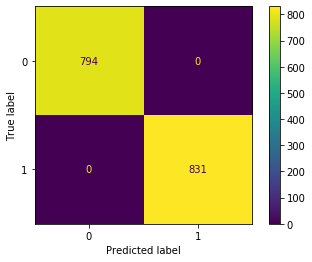

In [31]:
# 
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, test_data, y_test)

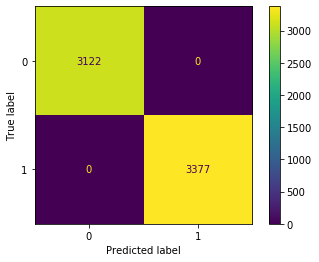

In [33]:
plot_confusion_matrix(model, train_data, y_train)